# Credit Card: Unsupervised Learning performing EDA and model analysis

My goal is to run only Unsupervised models and see the differencies when identifying anomalies in a credit card transaction data

## Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Data Reading

Based on the Final project instructions I've decided to get a data from Kaggle. I went to datasets and looked for something that I was interested in analysis and create models. So, I chose one of the salary bases they have there. I downloaded the data from https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

I haven't checked the data yet, so I started downloading the data from the kaggle webside and including it in my Jupyter lab to be able to read the data in my notebook

As per the Author, the dataset contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

The data is a CSV file

In [2]:
df = pd.read_csv('creditcard_data.csv')

## EDA (Exploratory Data Analysis)

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284806 entries, 0 to 284805
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284806 non-null  float64
 1   V1      284806 non-null  float64
 2   V2      284806 non-null  float64
 3   V3      284806 non-null  float64
 4   V4      284806 non-null  float64
 5   V5      284806 non-null  float64
 6   V6      284806 non-null  float64
 7   V7      284806 non-null  float64
 8   V8      284806 non-null  float64
 9   V9      284806 non-null  float64
 10  V10     284806 non-null  float64
 11  V11     284806 non-null  float64
 12  V12     284806 non-null  float64
 13  V13     284806 non-null  float64
 14  V14     284806 non-null  float64
 15  V15     284806 non-null  float64
 16  V16     284806 non-null  float64
 17  V17     284806 non-null  float64
 18  V18     284806 non-null  float64
 19  V19     284806 non-null  float64
 20  V20     284806 non-null  float64
 21  V21     28

There is no null values.

In [5]:
df.head(30)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


I run 30 row's to see if the class changes a little, I will run a histogram to see the values amount for each column

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,284806.000000,284806.000000,...,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,2.848060e+05,284806.000000,284806.000000
mean,94813.585781,0.000002,6.661837e-07,-0.000002,0.000002,4.405008e-08,0.000002,-0.000006,0.000001,-0.000002,...,-9.166149e-07,-0.000002,-0.000001,-3.088756e-08,0.000002,0.000003,8.483873e-09,-4.792707e-08,88.349168,0.001727
std,47488.004530,1.958699,1.651311e+00,1.516257,1.415871,1.380249e+00,1.332273,1.237092,1.194355,1.098634,...,7.345251e-01,0.725702,0.624461,6.056481e-01,0.521278,0.482225,4.036332e-01,3.300838e-01,250.120432,0.041527
min,0.000000,-56.407510,-7.271573e+01,-48.325589,-5.683171,-1.137433e+02,-26.160506,-43.557242,-73.216718,-13.434066,...,-3.483038e+01,-10.933144,-44.807735,-2.836627e+00,-10.295397,-2.604551,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.250000,-0.920374,-5.985522e-01,-0.890368,-0.848642,-6.915995e-01,-0.768296,-0.554080,-0.208628,-0.643098,...,-2.283974e-01,-0.542351,-0.161846,-3.545895e-01,-0.317142,-0.326979,-7.083961e-02,-5.295995e-02,5.600000,0.000000
50%,84691.500000,0.018109,6.549621e-02,0.179846,-0.019845,-5.433621e-02,-0.274186,0.040097,0.022358,-0.051429,...,-2.945020e-02,0.006781,-0.011196,4.097671e-02,0.016596,-0.052134,1.342244e-03,1.124381e-02,22.000000,0.000000
75%,139320.000000,1.315645,8.037257e-01,1.027198,0.743348,6.119267e-01,0.398567,0.570426,0.327346,0.597140,...,1.863701e-01,0.528548,0.147641,4.395270e-01,0.350716,0.240955,9.104579e-02,7.828043e-02,77.160000,0.000000
max,172788.000000,2.454930,2.205773e+01,9.382558,16.875344,3.480167e+01,73.301626,120.589494,20.007208,15.594995,...,2.720284e+01,10.503090,22.528412,4.584549e+00,7.519589,3.517346,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
columns_df = df.columns.values.tolist()

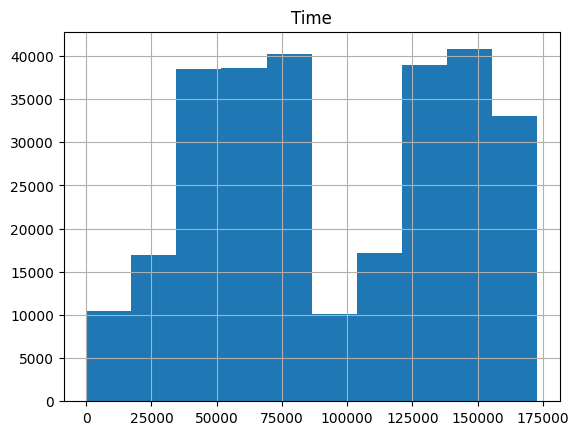

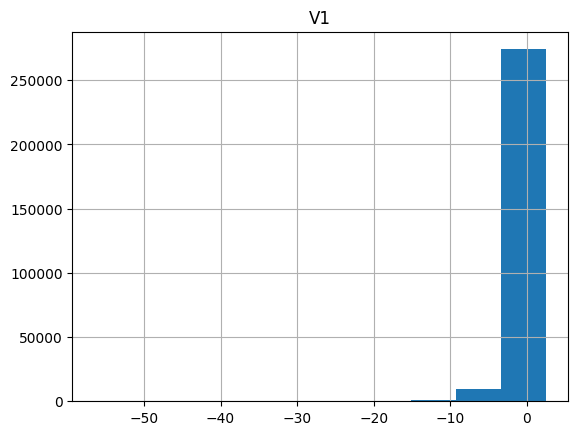

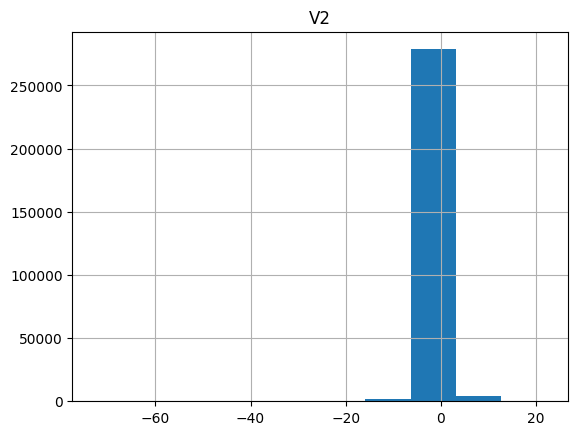

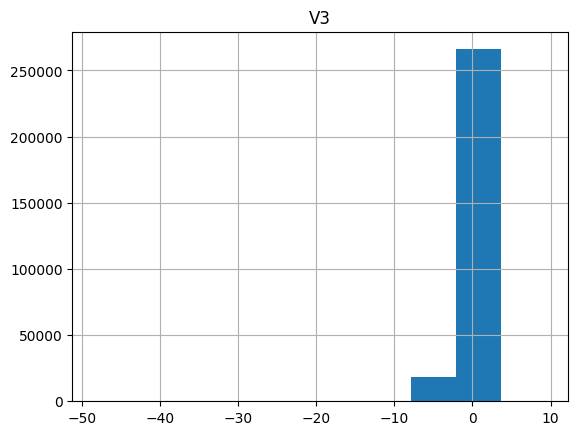

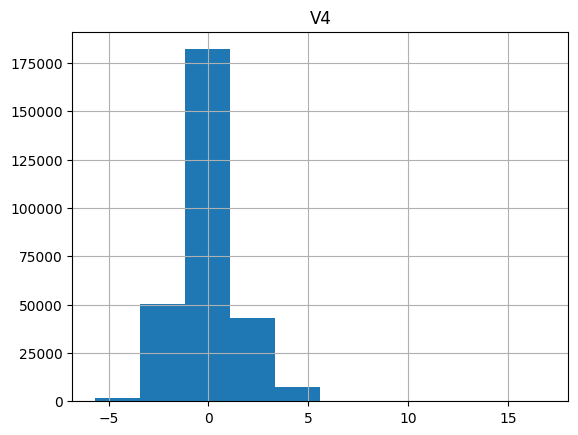

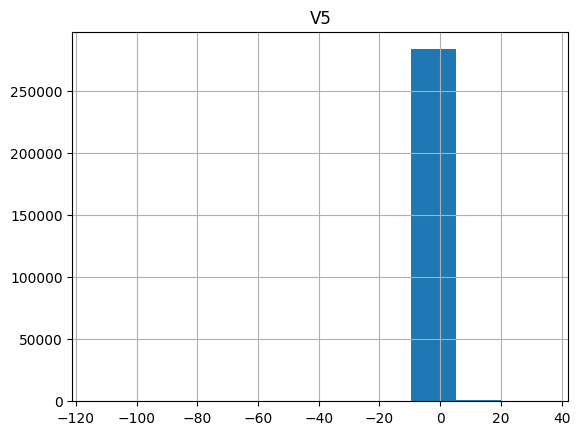

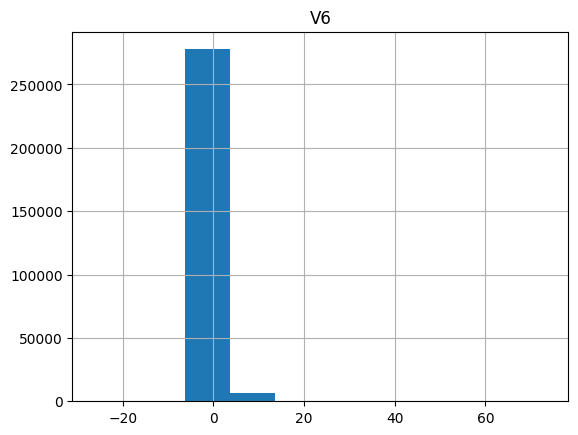

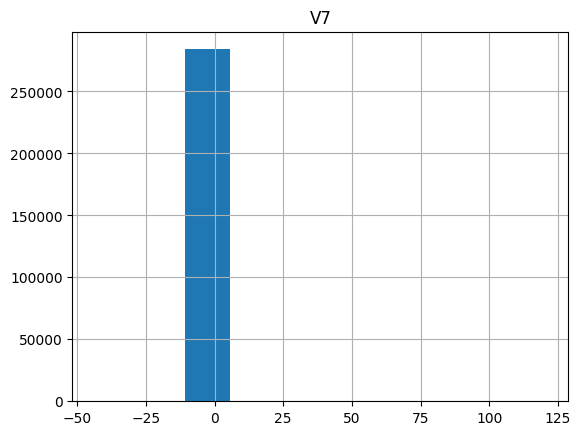

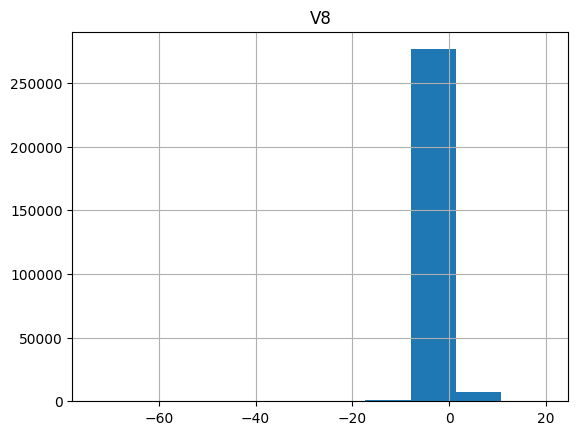

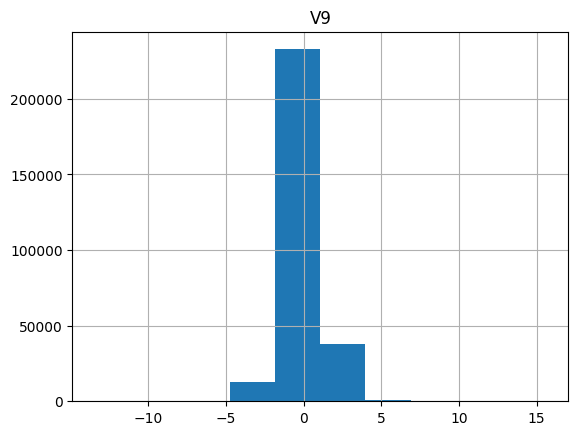

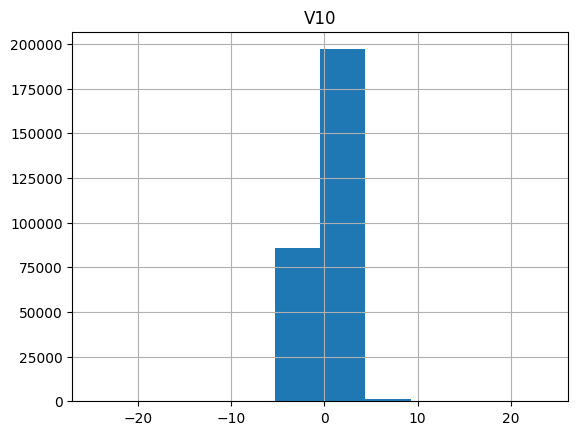

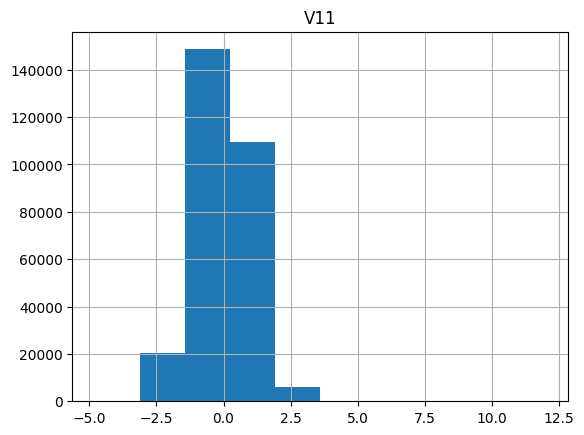

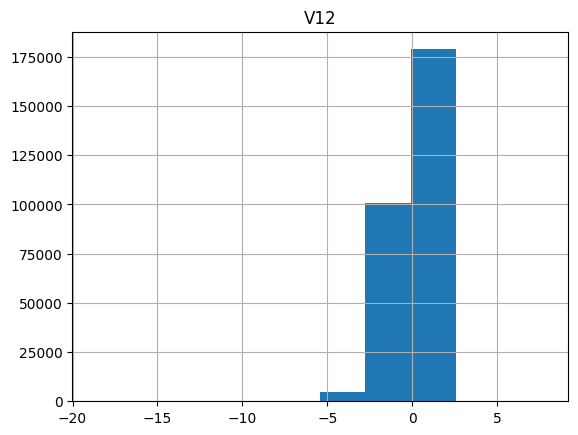

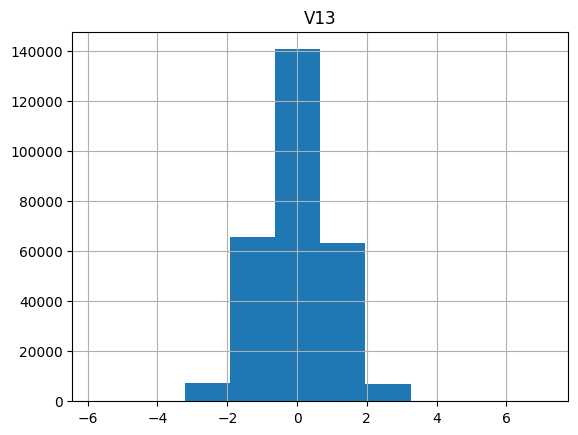

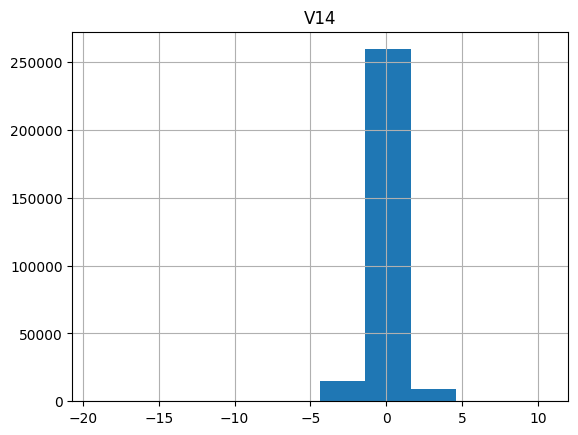

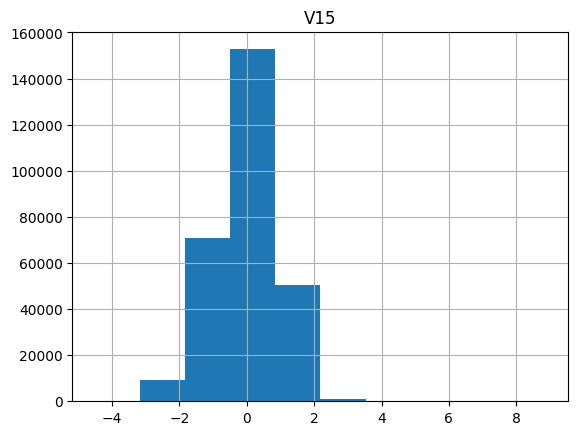

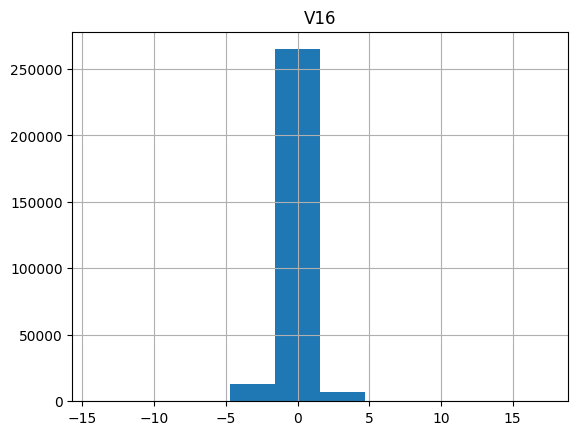

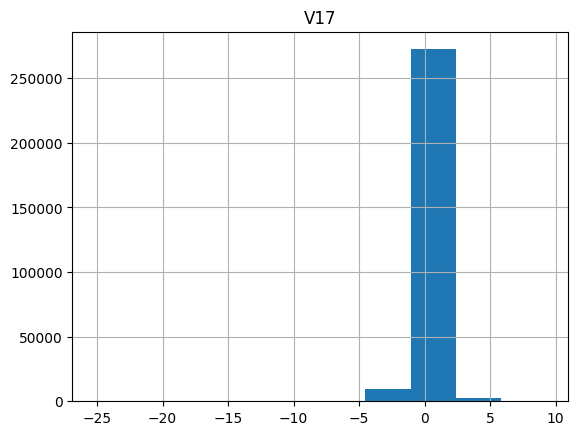

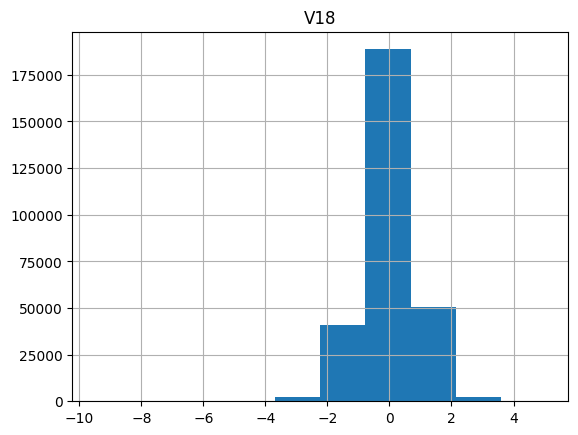

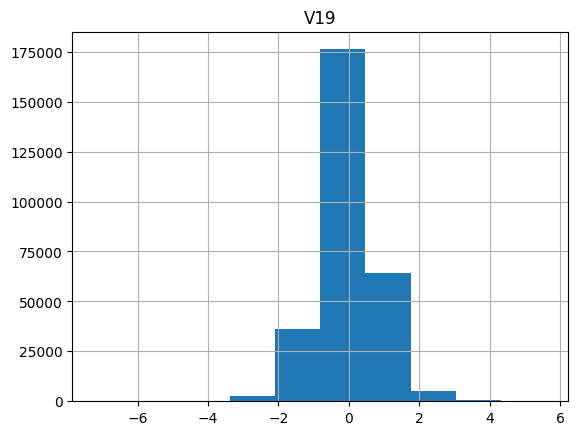

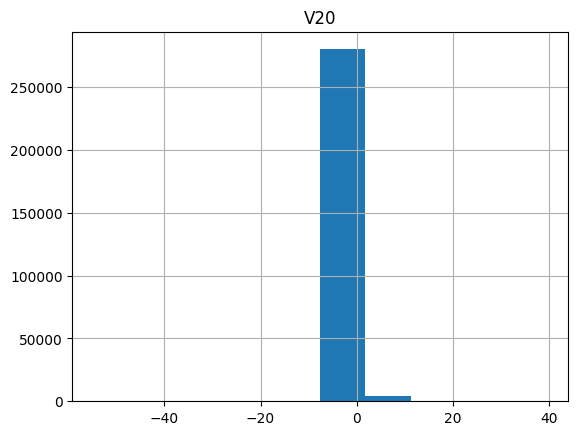

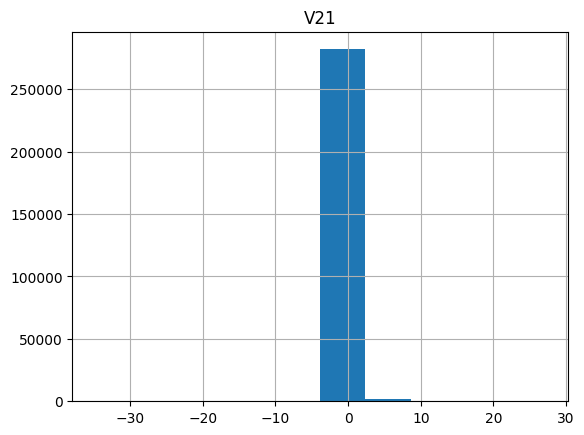

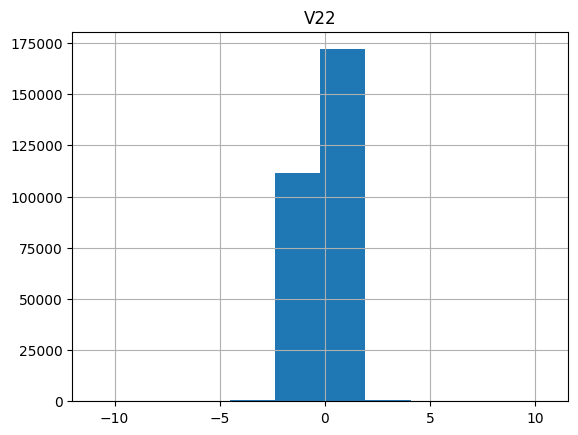

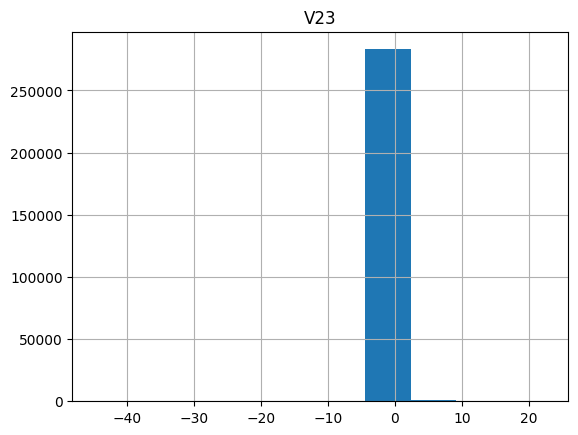

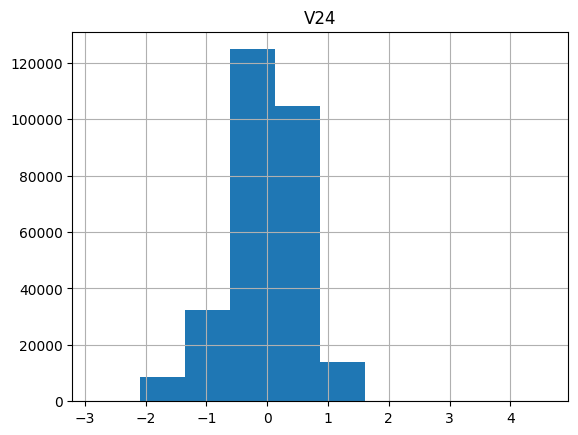

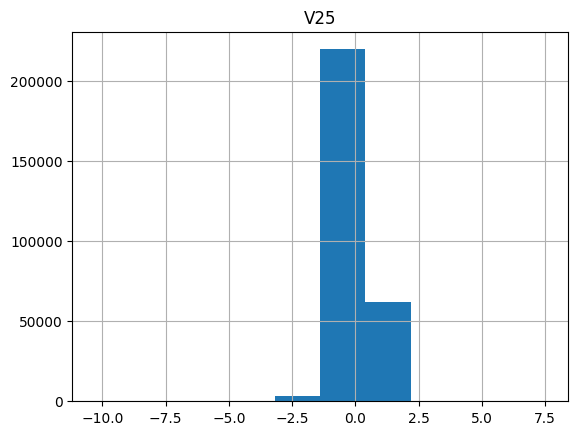

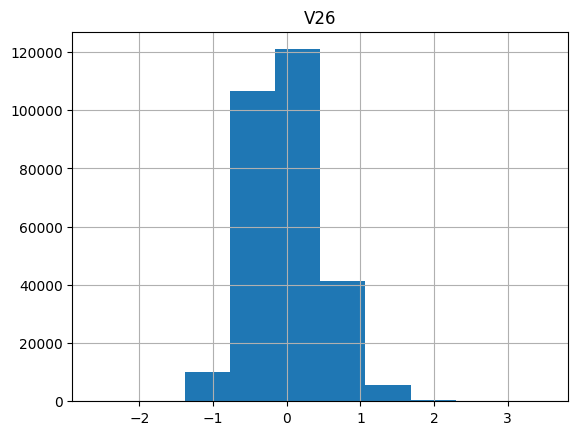

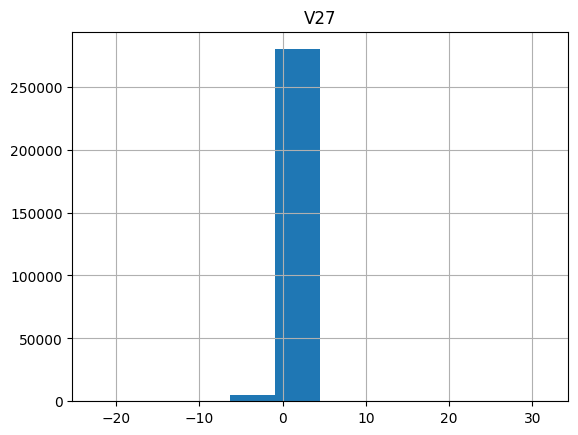

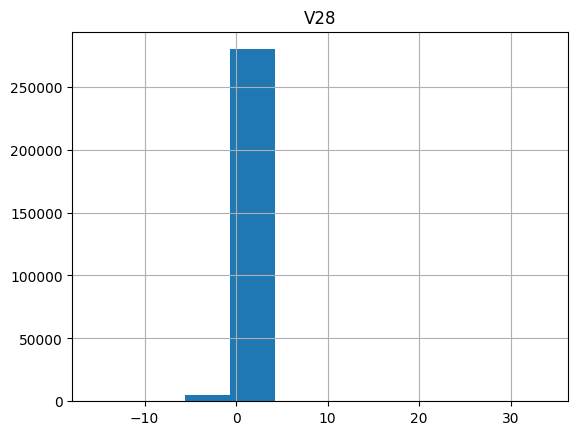

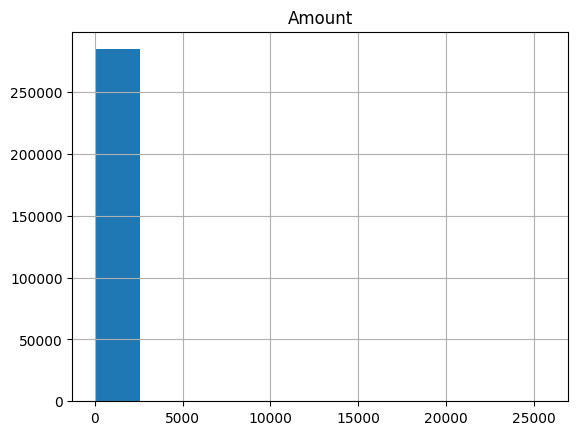

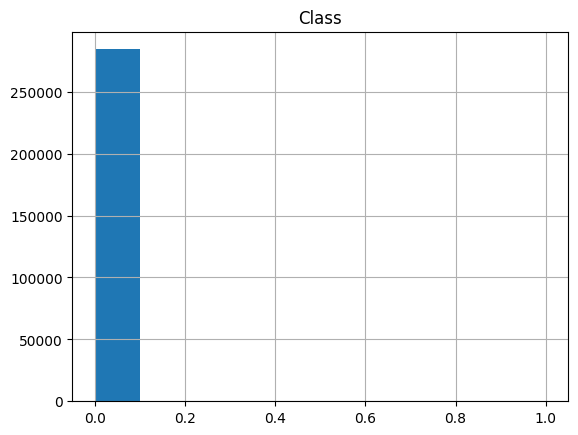

In [8]:
for c in columns_df:
    df[c].hist()
    plt.title(c)
    plt.show()

The histograms didn't give me the visualization I would like, so I will run box plot to have a better idea of the range of the columns of the data

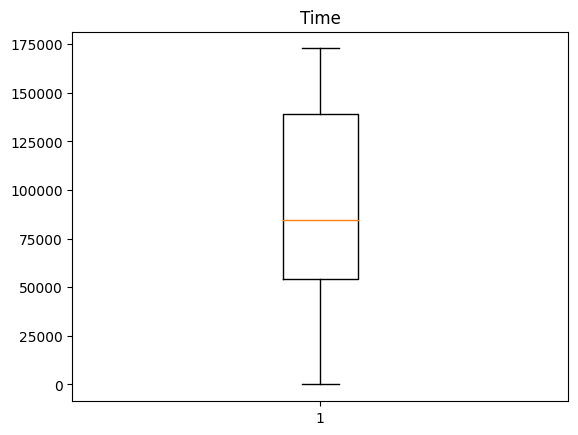

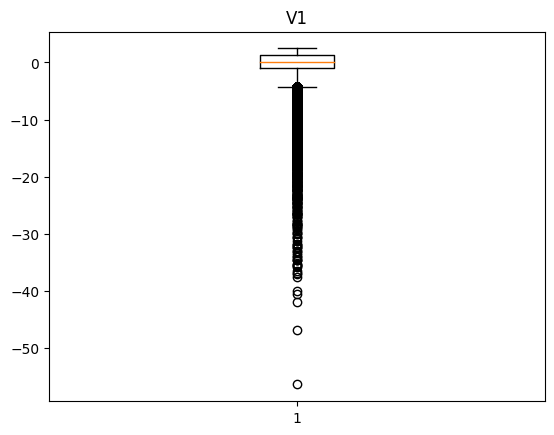

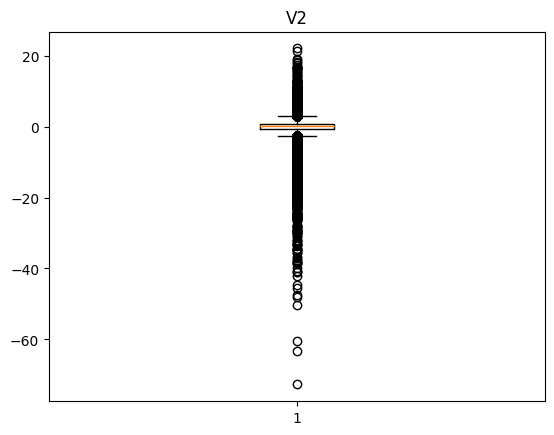

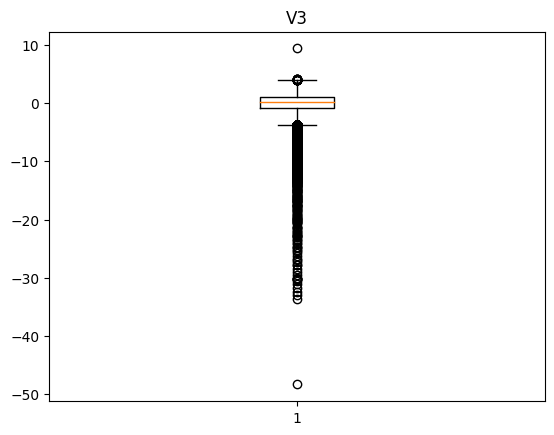

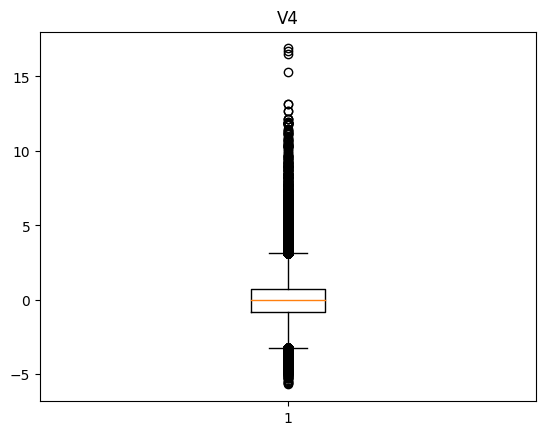

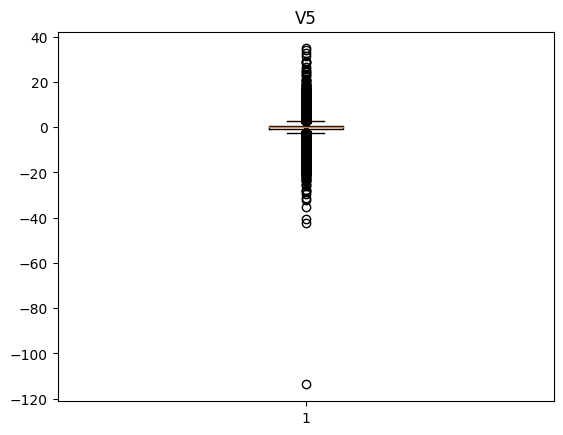

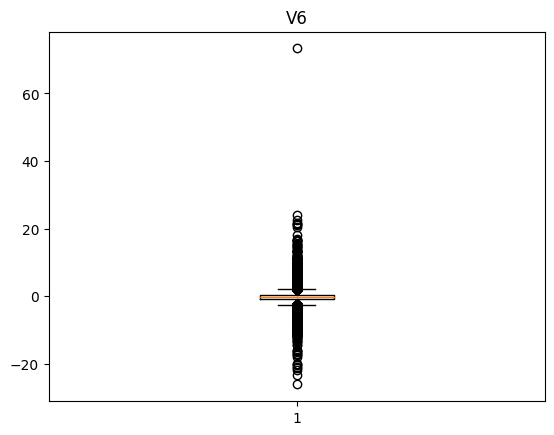

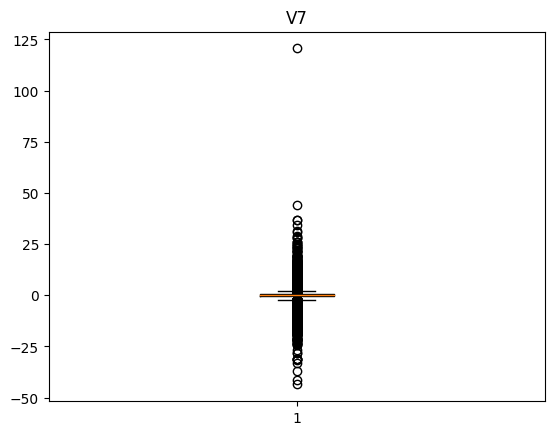

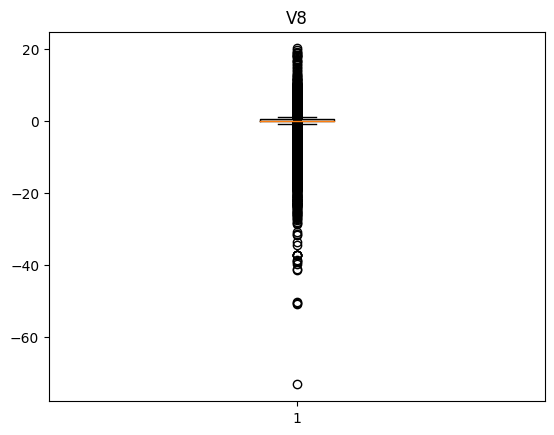

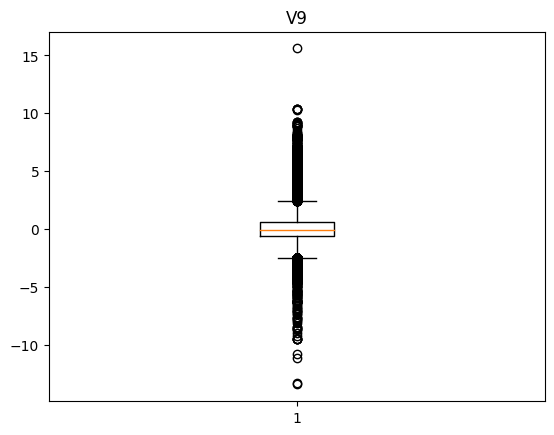

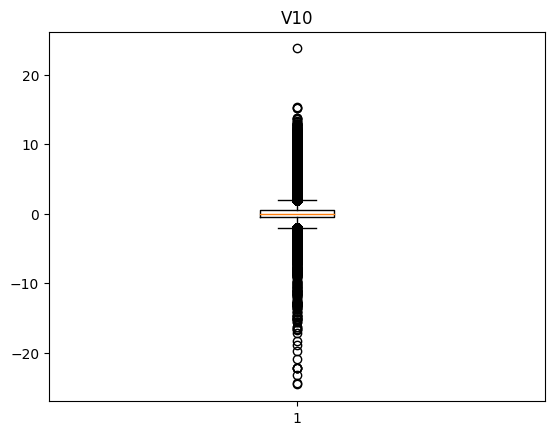

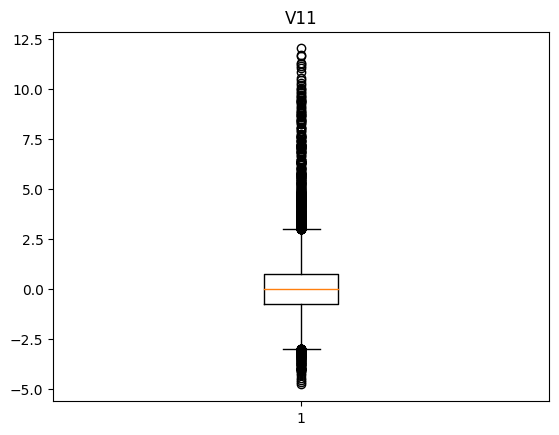

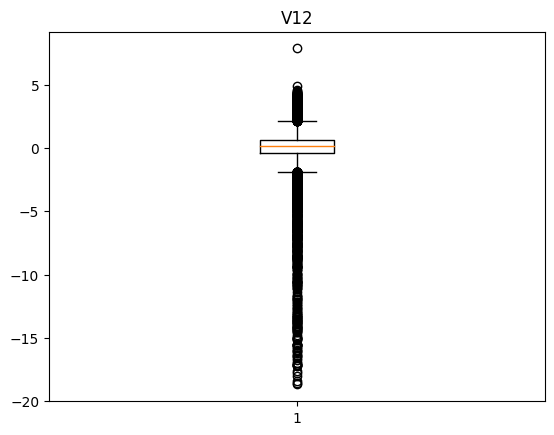

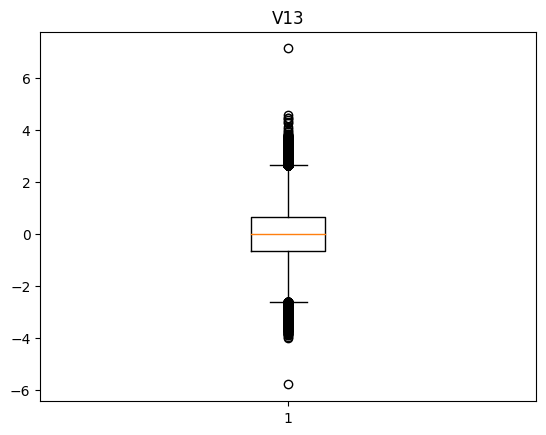

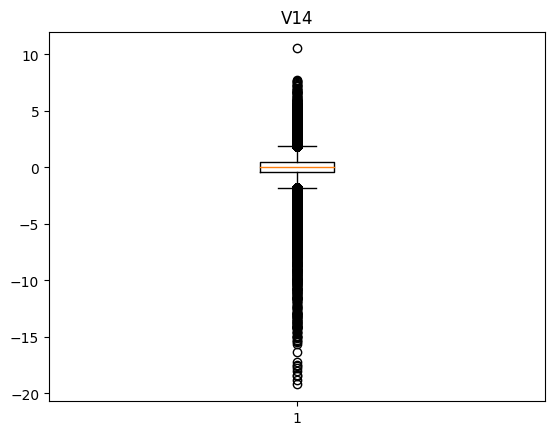

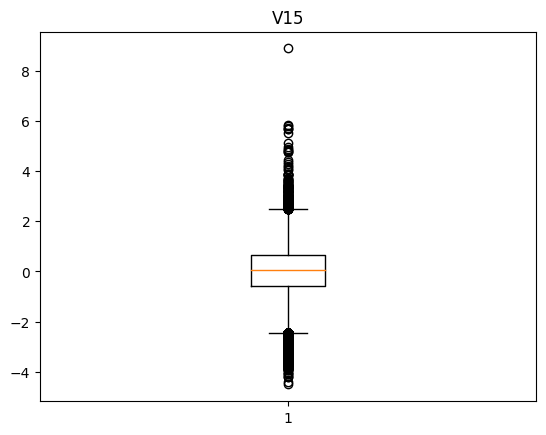

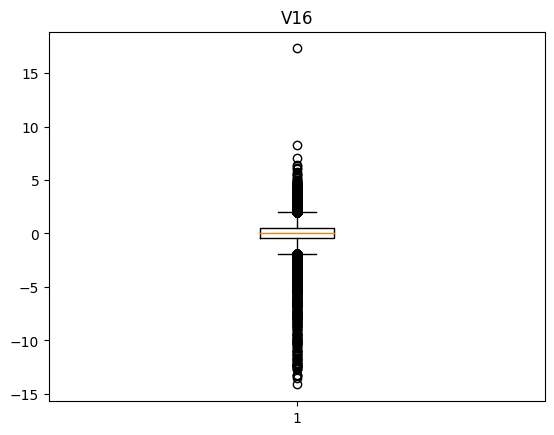

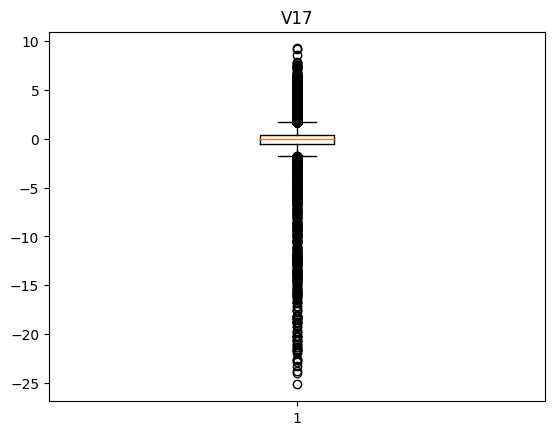

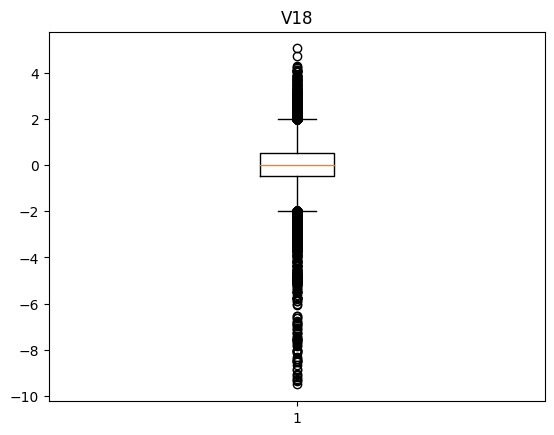

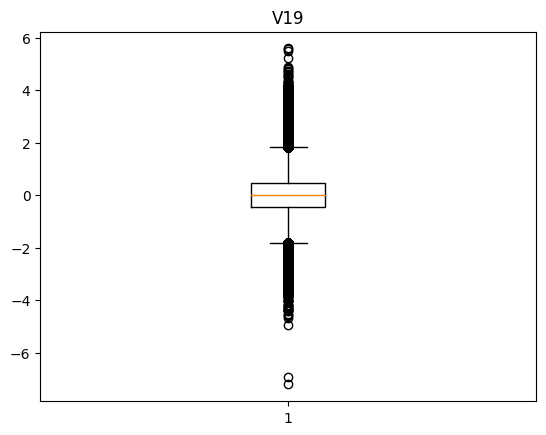

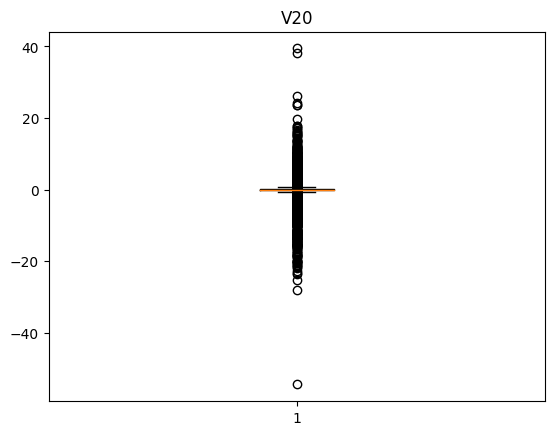

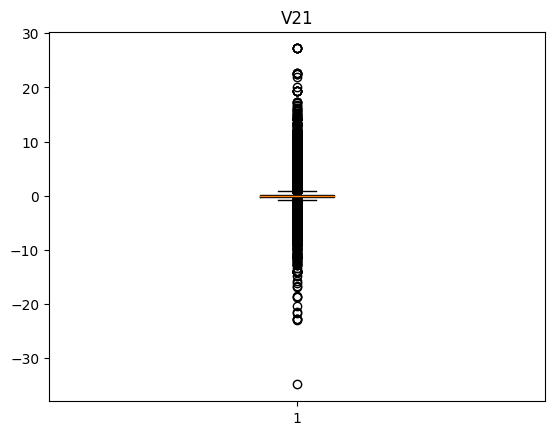

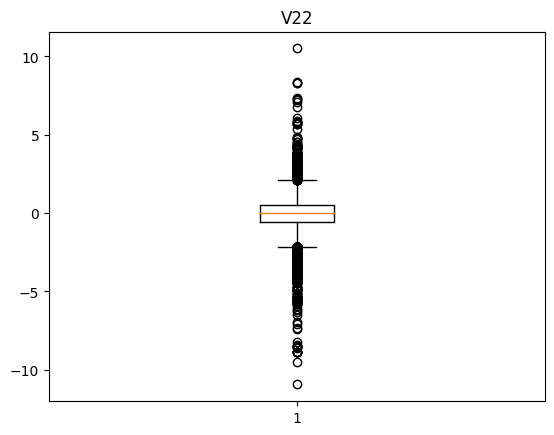

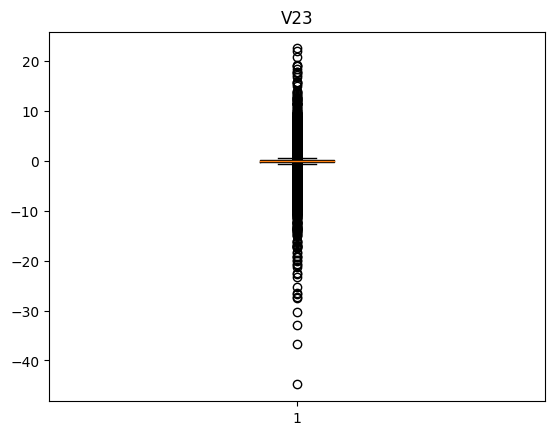

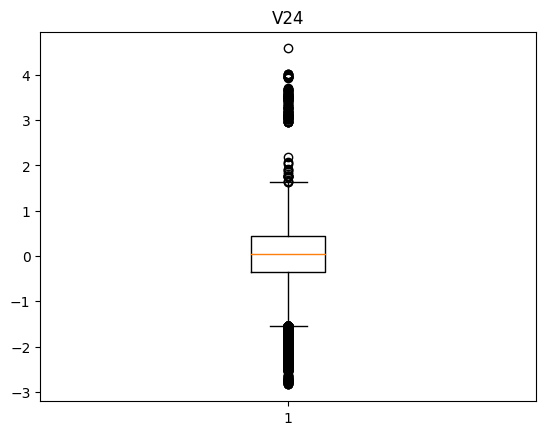

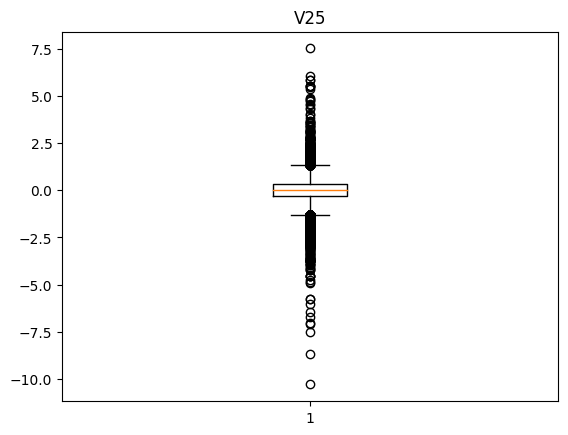

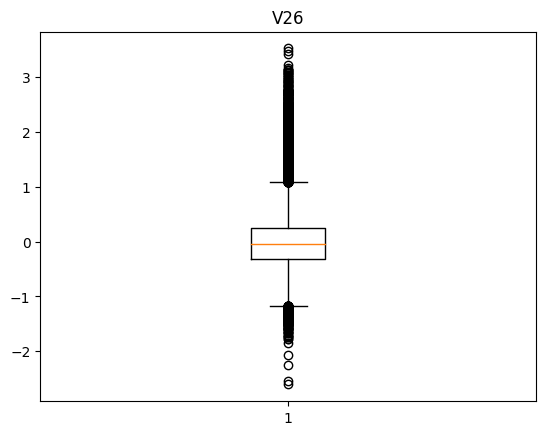

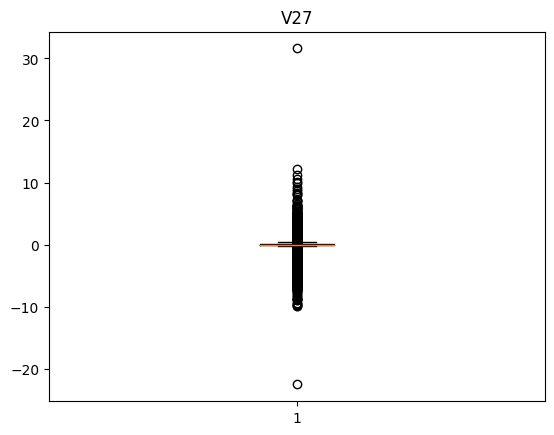

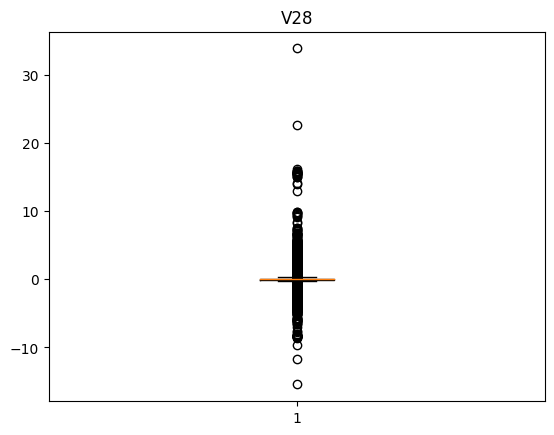

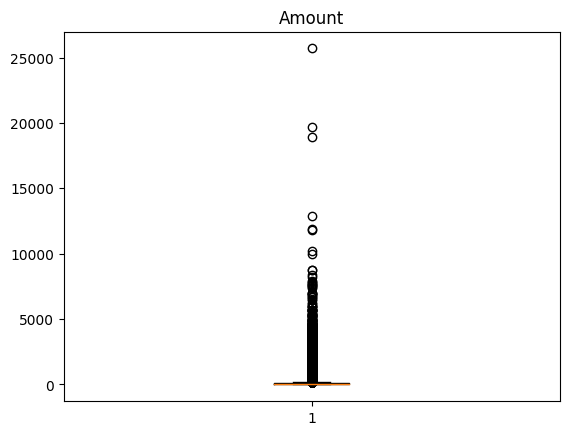

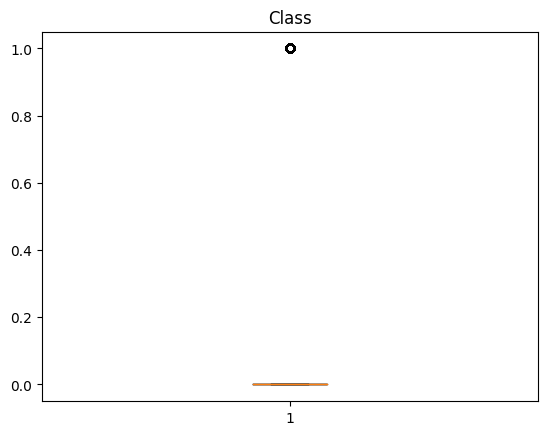

In [9]:
for c in columns_df:
    plt.boxplot(df[c])
    plt.title(c)
    plt.show()

From the boxplots I can see that most of the amounts are small values, class is 0 or 1, I will investigate what that means. And all the "V"s have a big variance from negative to positive values

In [10]:
df['Class'].value_counts()

0    284314
1       492
Name: Class, dtype: int64

So, for class column we have 492 Classes 1 and 284314 as classes 0. So class means that if the transaction is fraudulent (Class = 1) or not (Class = 0) 

In [11]:
df[df['Class'] == 1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


Let's investigate more the distribution of the normal transactions and fraudulent transactions

In [12]:
df[df['Class'] == 1]['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x21f64d73340>,
 'caps': [<matplotlib.lines.Line2D at 0x21f64d719f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21f64d71b40>],
 'medians': [<matplotlib.lines.Line2D at 0x21f64d73dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21f64d72470>],
 'means': []}

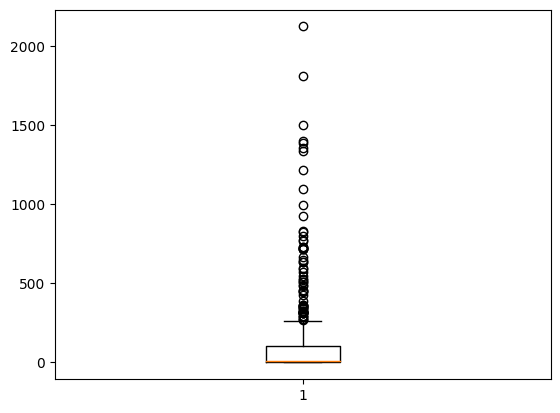

In [13]:
plt.boxplot(df[df['Class'] == 1]['Amount'])

We can see that fraudulent transations are usually low values, probably to not put attention on the victims nor the credict card's companies

Fraudent transactions are 492 out of 284806 or 0.1727% of the dataset, so the challenge here is how to train and predict anomalies with such a small quantity of Class = 1 situations

## Train and Test Data

Because the dataset is extremely imbalanced, I will divide the train and test data before fixing the imbalanced issue, so my test dataset will stay unbiased. I will use stratify to be able to have class = 1 in both test and train dataset. My split will be 9:1 so I have as much as I can in the training set to be able to perform undersampling with the df_train_b4

In [14]:
df_train_b4, df_test = train_test_split(df, test_size=0.1, stratify=df['Class'], random_state=10)

In [15]:
df_train_b4['Class'].value_counts()

0    255882
1       443
Name: Class, dtype: int64

In [16]:
df_test['Class'].value_counts()

0    28432
1       49
Name: Class, dtype: int64

For the undersampling, I will try to keep as much as information possible, so instead of taking only 443 samples of Class = 0 to match the Class = 1, I will go to the limit of what is considered a imbalacend data which is 60/40. So, the train data will have a total size of 1107 rows which 443 are the Class = 1 and 664 are Class = 0

For that, I will shuffle the df_train_b4 dataset, create a fraud_df and non_fraud_df and then concat them after to be able to create my final df_train

In [17]:
shuffled_df = df_train_b4.sample(frac=1,random_state=4)
fraud_df = shuffled_df.loc[shuffled_df['Class'] == 1]
non_fraud_df = shuffled_df.loc[shuffled_df['Class'] == 0].sample(n=664,random_state=42)
df_train = pd.concat([fraud_df, non_fraud_df])

In [18]:
df_train['Class'].value_counts()

0    664
1    443
Name: Class, dtype: int64

In [19]:
df_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
149145,90676.0,-2.405580,3.738235,-2.317843,1.367442,0.394001,1.919938,-3.106942,-10.764403,3.353525,...,10.005998,-2.454964,1.684957,0.118263,-1.531380,-0.695308,-0.152502,-0.138866,6.99,1
147548,88672.0,-3.859881,2.632881,-5.264265,3.446113,-0.675231,-1.904959,-3.291041,-0.985766,-1.168114,...,1.664119,0.785075,0.068412,0.778961,-0.863166,-0.006810,-1.065734,1.773326,1.18,1
151007,94362.0,-26.457745,16.497472,-30.177317,8.904157,-17.892600,-1.227904,-31.197329,-11.438920,-9.462573,...,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1.00,1
59539,48884.0,-2.139051,1.394368,-0.612035,1.049327,-1.162102,-0.768219,-1.997237,0.574997,-0.980832,...,0.696955,0.740003,-0.155115,-0.050607,0.268368,-0.469433,-0.405814,-0.152171,19.73,1
96789,65936.0,-3.593476,0.781442,-1.822448,0.605761,-1.194656,-0.517195,-1.722523,0.128890,0.014963,...,0.351792,0.391249,-0.252875,-0.498042,0.010172,0.909929,-1.478767,0.722673,101.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44150,41818.0,1.068194,0.093818,0.291780,0.493738,0.329178,0.785926,-0.131183,0.287380,-0.121272,...,0.145765,0.644212,0.098083,-0.579856,0.192409,0.504143,0.035022,-0.001161,1.50,0
218121,141176.0,2.325932,-1.253999,-1.620954,-1.887681,-0.546265,-0.302154,-0.900292,-0.152556,-1.826960,...,0.092905,0.694624,0.041794,0.237468,0.127978,0.049986,-0.019388,-0.069005,15.00,0
134426,80801.0,0.958659,0.027296,0.436077,2.673508,-0.171903,0.086653,0.176424,-0.016107,-0.260496,...,-0.187690,-0.718691,-0.149529,-0.162029,0.503987,-0.070387,-0.025227,0.037910,130.24,0
203411,134807.0,-0.048671,1.265668,0.858485,0.693872,1.449687,0.320079,1.423879,-0.855822,-0.494557,...,-0.488263,-0.825316,-0.444208,0.055877,0.160790,0.662406,-0.710828,-0.580330,1.98,0


In [20]:
df_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
124832,77438.0,0.604839,-1.886371,-0.554519,-0.174555,-1.244669,-0.729373,0.263710,-0.323298,-0.663309,...,-0.226300,-1.065347,-0.412884,0.077673,0.288845,1.071799,-0.156956,0.066526,434.10,0
71046,54128.0,-1.286924,-4.402553,-0.302811,1.866738,-2.555756,0.004332,0.920161,-0.156566,1.027945,...,0.847211,-0.428859,-1.160264,0.442004,-0.200812,0.338400,-0.244734,0.243562,1291.08,0
192553,129755.0,2.029379,-0.254796,-0.900013,0.353661,-0.407466,-1.097448,-0.072460,-0.257818,0.802079,...,-0.026464,0.051780,0.204942,0.080703,-0.218853,0.553159,-0.071572,-0.059633,15.00,0
23414,32742.0,1.034157,0.245015,1.372151,2.756526,-0.573240,0.343127,-0.390032,0.160543,-0.145277,...,0.137757,0.606196,-0.049873,0.444219,0.436121,0.154680,0.048374,0.032956,22.71,0
215506,140103.0,0.125527,0.739660,0.440761,-0.608379,0.500568,-1.098919,1.210822,-0.409829,0.151298,...,-0.311569,-0.571871,0.051139,0.029482,-0.525750,0.110230,0.079119,-0.125755,9.86,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172747,121225.0,1.795893,-1.228002,-1.408819,-0.087514,-0.868122,-1.145860,-0.043663,-0.399367,-0.230950,...,0.060044,0.397090,-0.133452,0.051683,0.128623,-0.040095,-0.026615,-0.021247,197.50,0
9707,14469.0,1.146263,-0.058671,0.962068,0.204882,-0.648656,-0.152151,-0.580629,0.042380,1.388963,...,0.031651,0.372176,0.021083,0.253778,0.092272,1.029338,-0.073417,-0.004723,15.95,0
37509,38987.0,-1.256484,-0.258534,1.804634,0.374305,0.817392,-1.813098,0.112970,-0.199562,-0.674214,...,0.120005,0.177829,-0.068295,1.050592,0.350952,1.265970,-0.065047,0.080934,14.86,0
43418,41501.0,-31.746663,17.418649,-31.813586,6.590421,-22.245025,-4.827882,-22.291962,17.941363,-3.776069,...,0.631021,-1.950280,-1.178763,0.149984,2.205306,-0.230525,1.063696,0.437115,1.00,0


In [21]:
df_test['Class'].value_counts()

0    28432
1       49
Name: Class, dtype: int64

In [22]:
type(df_test)

pandas.core.frame.DataFrame

## PCA

### PCR

In [23]:
features = columns_df[:-1]
X_train = df_train[features]
y_train = df_train['Class']

In [24]:
X_test = df_test[features]
y_test = df_test['Class']

In [25]:
type(y_train)

pandas.core.series.Series

Text(0.5, 1.0, 'hp')

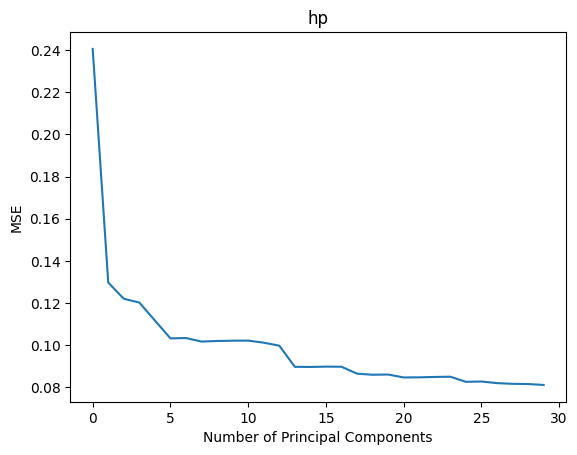

In [26]:
#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(X_train))

#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y_train, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 30):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y_train, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

In [27]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 37.6 ,  47.3 ,  53.81,  58.93,  63.71,  67.98,  71.9 ,  75.56,
        78.84,  81.73,  84.46,  86.95,  88.99,  90.72,  92.35,  93.82,
        94.94,  95.93,  96.76,  97.38,  97.92,  98.39,  98.72,  99.05,
        99.28,  99.51,  99.7 ,  99.87,  99.97, 100.  ])

Based on those 2 graphs, the best complexity vs benefit number of componentes of this PCA model will be 13 which gives us a MSE of 0.09 and accumulative explained ratio of 88.99%.

In [28]:
#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]
#print(X_reduced_test)
#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)

pred = regr.predict(X_reduced_test)
print(len(pred))
print(y_test)
print(df_test.shape)

28481
124832    0
71046     0
192553    0
23414     0
215506    0
         ..
172747    0
9707      0
37509     0
43418     0
22069     0
Name: Class, Length: 28481, dtype: int64
(28481, 31)


In [29]:
df_test['Prediction'] = pred

For this kind of dataset, we are not interested in the accuracy of the model because we know it will be high as most of the data is non fraudulent transactions, instead we will evaluate the precision and recall of the model. If the model predictied Class >= 1 is considered fraud, if the model predict Class < 1 is considered normal transaction. 

In [30]:
#True Positive(TP), True Negative(TN), False Positive(FP), False Negative(FN)
def tptnfpfn(df):
    tp = ((df['Class']==1) & (df['Prediction'] >= 1)).value_counts()[1]
    fp = ((df['Class']==0) & (df['Prediction'] >= 1)).value_counts()[1]
    fn = (df['Class'] == 1).value_counts()[1] - tp
    tn = (df['Class'] == 0).value_counts()[0] - fp
    return tp, fp, fn, tn

In [31]:
tp, fp, fn, tn = tptnfpfn(df_test)

In [32]:
class Confusion_matrix():
    def correct_classification_rate (tp,fp):
        return print("Precision: Returns the proportion of correctly classified data.\n\tTP / (TP + FP) = %",(tp/(tp+fp)*100))
    def just_positive_classification_rate (tp,fn):
        return print("Recall: Returns only the proportion of those classified correctly from positive values.\n\tTP / (TP + FN) = %",(tp/(tp+fn)*100))

Confusion_matrix.correct_classification_rate(tp,fp)
Confusion_matrix.just_positive_classification_rate(tp,fn)

Precision: Returns the proportion of correctly classified data.
	TP / (TP + FP) = % 76.0
Recall: Returns only the proportion of those classified correctly from positive values.
	TP / (TP + FN) = % 77.55102040816327


Text(0.5, 23.52222222222222, 'Actual')

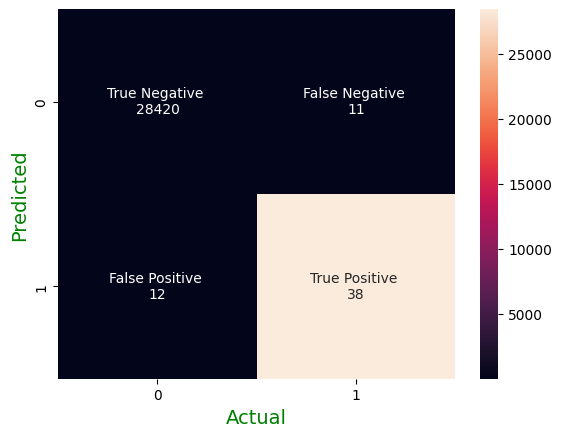

In [33]:
confusion_matrix_ar =[[fp,fn],[tp,tn]] 

labels = [f"True Negative \n{tn}",
          f"False Negative \n{fn}",
          f"False Positive \n{fp}",
          f"True Positive \n{tp}"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap( confusion_matrix_ar,annot=labels,fmt="")
plt.ylabel('Predicted', fontsize=14, color="green")
plt.xlabel('Actual', fontsize=14, color="green")

### Logistic Regression

With those results we can say that the model predicts the anomaly 76% of the time (its precision is 76%) and identifies correctely an anomaly with 77.5% (its recall is 77.5%)

In [34]:
df_test = df_test.drop(['Prediction'], axis=1)

In [35]:
lr = LogisticRegression(C=10,max_iter=500)

In [36]:
lr.fit(X_reduced_train[:,:1], y_train)

pred = lr.predict(X_reduced_test)

In [37]:
df_test['Prediction'] = pred

In [38]:
tp, fp, fn, tn = tptnfpfn(df_test)

In [39]:
Confusion_matrix.correct_classification_rate(tp,fp)
Confusion_matrix.just_positive_classification_rate(tp,fn)

Precision: Returns the proportion of correctly classified data.
	TP / (TP + FP) = % 18.702290076335878
Recall: Returns only the proportion of those classified correctly from positive values.
	TP / (TP + FN) = % 100.0


Text(0.5, 23.52222222222222, 'Actual')

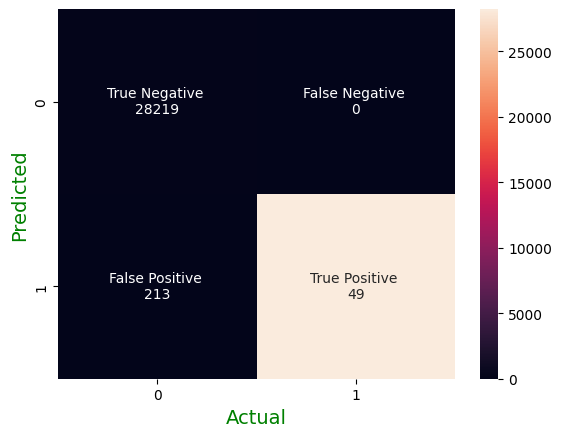

In [40]:
confusion_matrix_ar =[[fp,fn],[tp,tn]] 

labels = [f"True Negative \n{tn}",
          f"False Negative \n{fn}",
          f"False Positive \n{fp}",
          f"True Positive \n{tp}"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap( confusion_matrix_ar,annot=labels,fmt="")
plt.ylabel('Predicted', fontsize=14, color="green")
plt.xlabel('Actual', fontsize=14, color="green")

## K-means Clustering

In [41]:
df_test = df_test.drop(['Prediction'], axis=1)

In [42]:
kmeans = KMeans(n_clusters=2)
clustered_training_set = kmeans.fit(X_train, y_train)
pred = kmeans.predict(X_test)

C:\Users\Rodrigo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [43]:
df_test['Prediction'] = pred

In [44]:
tp, fp, fn, tn = tptnfpfn(df_test)

In [45]:
Confusion_matrix.correct_classification_rate(tp,fp)
Confusion_matrix.just_positive_classification_rate(tp,fn)

Precision: Returns the proportion of correctly classified data.
	TP / (TP + FP) = % 0.1303780964797914
Recall: Returns only the proportion of those classified correctly from positive values.
	TP / (TP + FN) = % 34.69387755102041


Text(0.5, 23.52222222222222, 'Actual')

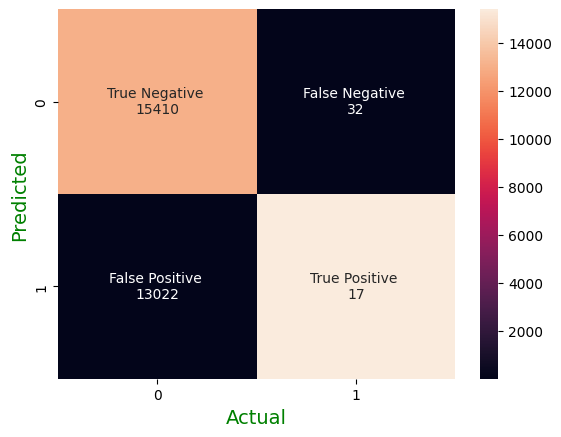

In [46]:
confusion_matrix_ar =[[fp,fn],[tp,tn]] 

labels = [f"True Negative \n{tn}",
          f"False Negative \n{fn}",
          f"False Positive \n{fp}",
          f"True Positive \n{tp}"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap( confusion_matrix_ar,annot=labels,fmt="")
plt.ylabel('Predicted', fontsize=14, color="green")
plt.xlabel('Actual', fontsize=14, color="green")

## Matrix Factorization SVD with Random Forest Classifier

In [47]:
df_test = df_test.drop(['Prediction'], axis=1)

In [48]:
svd = TruncatedSVD(n_components=13)
svd.fit(X_train)

X_train_svd=svd.fit_transform(X_train)

In [49]:
X_test_svd=svd.transform(X_test)

In [50]:
rf = RandomForestClassifier(n_estimators=100, max_depth = 1)

In [51]:
rf.fit(X_train_svd, y_train)
pred = rf.predict(X_test_svd)

In [52]:
df_test['Prediction'] = pred

In [53]:
tp, fp, fn, tn = tptnfpfn(df_test)

In [54]:
Confusion_matrix.correct_classification_rate(tp,fp)
Confusion_matrix.just_positive_classification_rate(tp,fn)

Precision: Returns the proportion of correctly classified data.
	TP / (TP + FP) = % 12.916666666666668
Recall: Returns only the proportion of those classified correctly from positive values.
	TP / (TP + FN) = % 63.26530612244898


Text(0.5, 23.52222222222222, 'Actual')

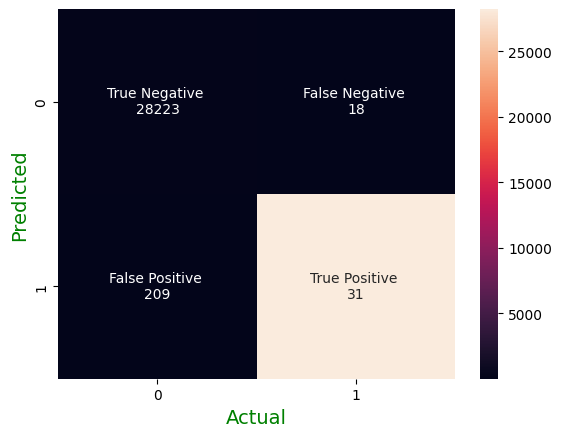

In [55]:
confusion_matrix_ar =[[fp,fn],[tp,tn]] 

labels = [f"True Negative \n{tn}",
          f"False Negative \n{fn}",
          f"False Positive \n{fp}",
          f"True Positive \n{tp}"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap( confusion_matrix_ar,annot=labels,fmt="")
plt.ylabel('Predicted', fontsize=14, color="green")
plt.xlabel('Actual', fontsize=14, color="green")

## Results and Conclusion

Best precision and recall combination model was PCR, but it I was a credict card company I would usethe PCA with Logistics Regression because it predicted all the anomalies even though some of the normal transactions were considered fraud.

<table>
<thead>
<tr><th>Model</th><th>Precision</th><th>Recall</th></tr>
</thead>
<tbody>
<tr><td>PCR</td><td>76%</td><td>77.55%</td></tr>
<tr><td>LR</td><td>18.7%</td><td>100%</td></tr>
<tr><td>K-means</td><td>0.13%</td><td>34.69%</td></tr>
<tr><td>SVD RF</td><td>12.92%</td><td>63.27%</td></tr>
</tbody>
</table>

I used undersampling in my program, maybe with SMOTE or even oversampling I could have had better results and combining with Ramdon Forest or SVD. I didn't considered supervised learning methods without using decomposition first, but it should be one of the options to be able to see if supervised learning methods can perform better. But I believe the best can be done for imbalanced dataset is how good you treat and fix the data and then you can choose the best model based on the data characteristics.